# 10 minutes to Dask

https://docs.dask.org/en/stable/10-minutes-to-dask.html

In [65]:
def print_obj(obj, tag=None):
    """
    Print an object in terms of type and then display is.
    """
    if tag:
        print(tag)
    print("type=", type(obj))
    display(obj)

In [67]:
def print_dask(obj):
    """
    Print information about a dask task graph.
    """
    print("type=", type(obj))
    print("obj=", obj)
    #
    print("# display")
    display(obj)
    #
    print("# dask")
    display(obj.dask)
    #
    print("# visualize")
    display(obj.visualize())
    #
    print("# compute")
    res = obj.compute()
    print(type(res))
    print(res)

## DataFrame

### Creating an object

In [61]:
import numpy as np
import pandas as pd

import dask.dataframe as dd
import dask.array as da
import dask.bag as db

In [69]:
# Create a df with 2400 rows indexed in datetimes.
index = pd.date_range("2021-09-01", periods=2400, freq="1H")
df = pd.DataFrame({
    "a": np.arange(2400),
    "b": list("abcaddbe" * 300)
    },
    index=index)

# Print the df as Pandas and Dask df.
print_obj(df, "# Pandas df")

# Pandas df
type= <class 'pandas.core.frame.DataFrame'>


,a,b
2021-09-01 00:00:00,0,a
2021-09-01 01:00:00,1,b
2021-09-01 02:00:00,2,c
2021-09-01 03:00:00,3,a
2021-09-01 04:00:00,4,d
...,...,...
2021-12-09 19:00:00,2395,a
2021-12-09 20:00:00,2396,d
2021-12-09 21:00:00,2397,d
2021-12-09 22:00:00,2398,b


type= <class 'dask.dataframe.core.DataFrame'>
obj= Dask DataFrame Structure:
                         a       b
npartitions=10                    
2021-09-01 00:00:00  int64  object
2021-09-11 00:00:00    ...     ...
...                    ...     ...
2021-11-30 00:00:00    ...     ...
2021-12-09 23:00:00    ...     ...
Dask Name: from_pandas, 1 graph layer
# display


,a,b
npartitions=10,,
2021-09-01 00:00:00,int64,object
2021-09-11 00:00:00,...,...
...,...,...
2021-11-30 00:00:00,...,...
2021-12-09 23:00:00,...,...


# dask


HighLevelGraph with 1 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7f06570e7ca0>
 0. from_pandas-e8d0c92b0364d788dd904838361b0fa2

# visualize


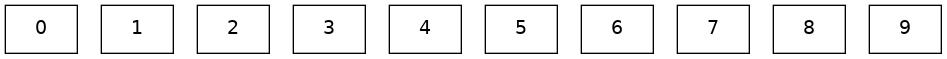

# compute
<class 'pandas.core.frame.DataFrame'>
                        a  b
2021-09-01 00:00:00     0  a
2021-09-01 01:00:00     1  b
2021-09-01 02:00:00     2  c
2021-09-01 03:00:00     3  a
2021-09-01 04:00:00     4  d
...                   ... ..
2021-12-09 19:00:00  2395  a
2021-12-09 20:00:00  2396  d
2021-12-09 21:00:00  2397  d
2021-12-09 22:00:00  2398  b
2021-12-09 23:00:00  2399  e

[2400 rows x 2 columns]


In [70]:
# Convert object into Dask.
ddf = dd.from_pandas(df, npartitions=10)
print_dask(ddf)

In [71]:
# Print the partitions, in terms of indices covered by each partition.
obj = ddf.divisions
print_obj(obj)

type= <class 'tuple'>


(Timestamp('2021-09-01 00:00:00', freq='H'),
 Timestamp('2021-09-11 00:00:00', freq='H'),
 Timestamp('2021-09-21 00:00:00', freq='H'),
 Timestamp('2021-10-01 00:00:00', freq='H'),
 Timestamp('2021-10-11 00:00:00', freq='H'),
 Timestamp('2021-10-21 00:00:00', freq='H'),
 Timestamp('2021-10-31 00:00:00', freq='H'),
 Timestamp('2021-11-10 00:00:00', freq='H'),
 Timestamp('2021-11-20 00:00:00', freq='H'),
 Timestamp('2021-11-30 00:00:00', freq='H'),
 Timestamp('2021-12-09 23:00:00', freq='H'))

In [72]:
# Print one partition.
obj =  ddf.partitions[1]
print_obj(obj)

type= <class 'dask.dataframe.core.DataFrame'>


,a,b
npartitions=1,,
2021-09-11,int64,object
2021-09-21,...,...


### Indexing

type= <class 'dask.dataframe.core.Series'>
obj= Dask Series Structure:
npartitions=10
2021-09-01 00:00:00    object
2021-09-11 00:00:00       ...
                        ...  
2021-11-30 00:00:00       ...
2021-12-09 23:00:00       ...
Name: b, dtype: object
Dask Name: getitem, 2 graph layers
# display


Dask Series Structure:
npartitions=10
2021-09-01 00:00:00    object
2021-09-11 00:00:00       ...
                        ...  
2021-11-30 00:00:00       ...
2021-12-09 23:00:00       ...
Name: b, dtype: object
Dask Name: getitem, 2 graph layers

# dask


HighLevelGraph with 2 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7f0657277b50>
 0. from_pandas-e8d0c92b0364d788dd904838361b0fa2
 1. getitem-604b114562d51695bd1d3710f2d1e611

# visualize


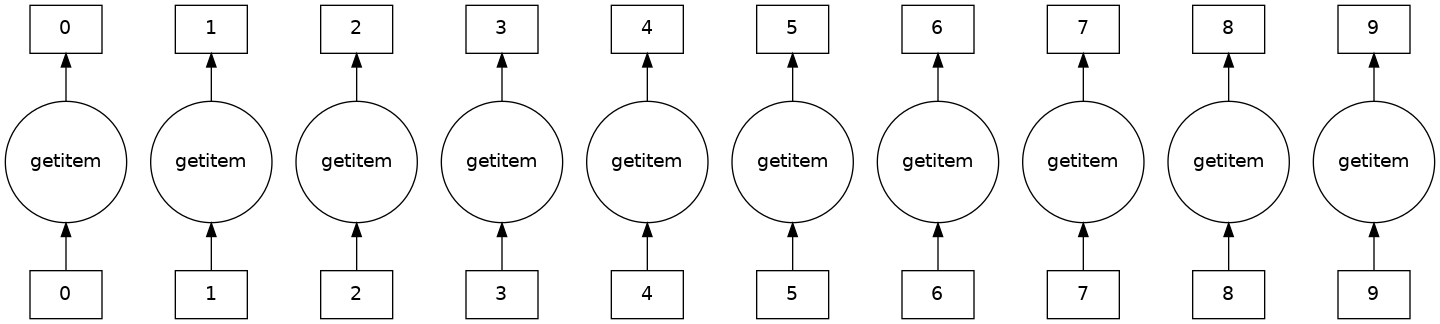

# compute
<class 'pandas.core.series.Series'>
2021-09-01 00:00:00    a
2021-09-01 01:00:00    b
2021-09-01 02:00:00    c
2021-09-01 03:00:00    a
2021-09-01 04:00:00    d
                      ..
2021-12-09 19:00:00    a
2021-12-09 20:00:00    d
2021-12-09 21:00:00    d
2021-12-09 22:00:00    b
2021-12-09 23:00:00    e
Freq: H, Name: b, Length: 2400, dtype: object


In [74]:
obj = ddf["b"]
print_dask(obj)

In [75]:
# This doesn't force to execute.
obj = ddf["2021-10-01": "2021-10-09 5:00"]
print_obj(obj)

type= <class 'dask.dataframe.core.DataFrame'>


,a,b
npartitions=1,,
2021-10-01 00:00:00.000000000,int64,object
2021-10-09 05:00:59.999999999,...,...


type= <class 'dask.dataframe.core.DataFrame'>
obj= Dask DataFrame Structure:
                                   a       b
npartitions=1                               
2021-10-01 00:00:00.000000000  int64  object
2021-10-09 05:00:59.999999999    ...     ...
Dask Name: loc, 2 graph layers
# display


,a,b
npartitions=1,,
2021-10-01 00:00:00.000000000,int64,object
2021-10-09 05:00:59.999999999,...,...


# dask


HighLevelGraph with 2 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7f0657121f30>
 0. from_pandas-e8d0c92b0364d788dd904838361b0fa2
 1. loc-4d57ed2634286c47ae7720535278fbac

# visualize


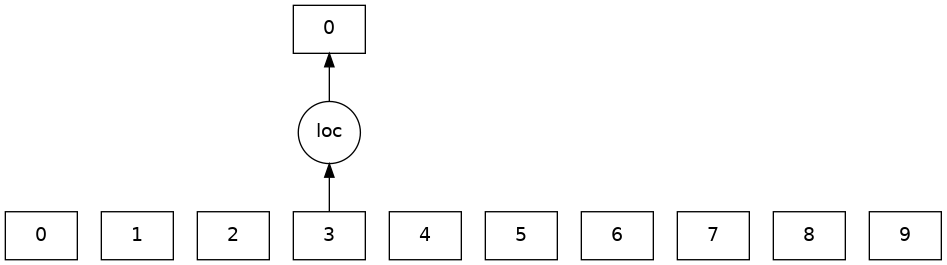

# compute
<class 'pandas.core.frame.DataFrame'>
                       a  b
2021-10-01 00:00:00  720  a
2021-10-01 01:00:00  721  b
2021-10-01 02:00:00  722  c
2021-10-01 03:00:00  723  a
2021-10-01 04:00:00  724  d
...                  ... ..
2021-10-09 01:00:00  913  b
2021-10-09 02:00:00  914  c
2021-10-09 03:00:00  915  a
2021-10-09 04:00:00  916  d
2021-10-09 05:00:00  917  d

[198 rows x 2 columns]


In [76]:
print_dask(obj)

### Computation

In [77]:
# Force to read, in fact the output is a Pandas DataFrame.
obj = ddf["2021-10-01": "2021-10-09 5:00"].compute()
print_obj(obj)

type= <class 'pandas.core.frame.DataFrame'>


,a,b
2021-10-01 00:00:00,720,a
2021-10-01 01:00:00,721,b
2021-10-01 02:00:00,722,c
2021-10-01 03:00:00,723,a
2021-10-01 04:00:00,724,d
...,...,...
2021-10-09 01:00:00,913,b
2021-10-09 02:00:00,914,c
2021-10-09 03:00:00,915,a
2021-10-09 04:00:00,916,d


### Methods

In [78]:
# Compute the mean of a column (delayed).
obj = ddf.a.mean()
print_obj(obj)

type= <class 'dask.dataframe.core.Scalar'>


dd.Scalar<series-..., dtype=float64>

type= <class 'dask.dataframe.core.Scalar'>
obj= dd.Scalar<series-..., dtype=float64>
# display


dd.Scalar<series-..., dtype=float64>

# dask


HighLevelGraph with 7 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7f0657276b00>
 0. from_pandas-e8d0c92b0364d788dd904838361b0fa2
 1. getitem-1a3e188d5ed160eaa4ca6f8e5722822d
 2. series-count-chunk-aa3ad10939808f586bdeb27ba3085064-f9e3256fdb0b967674f94fee4b432907
 3. series-count-agg-aa3ad10939808f586bdeb27ba3085064
 4. series-sum-chunk-dc81eb22940d9fc2c51fcbf7458fa055-dde971ba948e186f6a720b330ecb0c90
 5. series-sum-agg-dc81eb22940d9fc2c51fcbf7458fa055
 6. series-mean-927e224da3a30a3addfd31d5a1cd9096-59c23d4174e86f881b13de1cac37a65a

# visualize


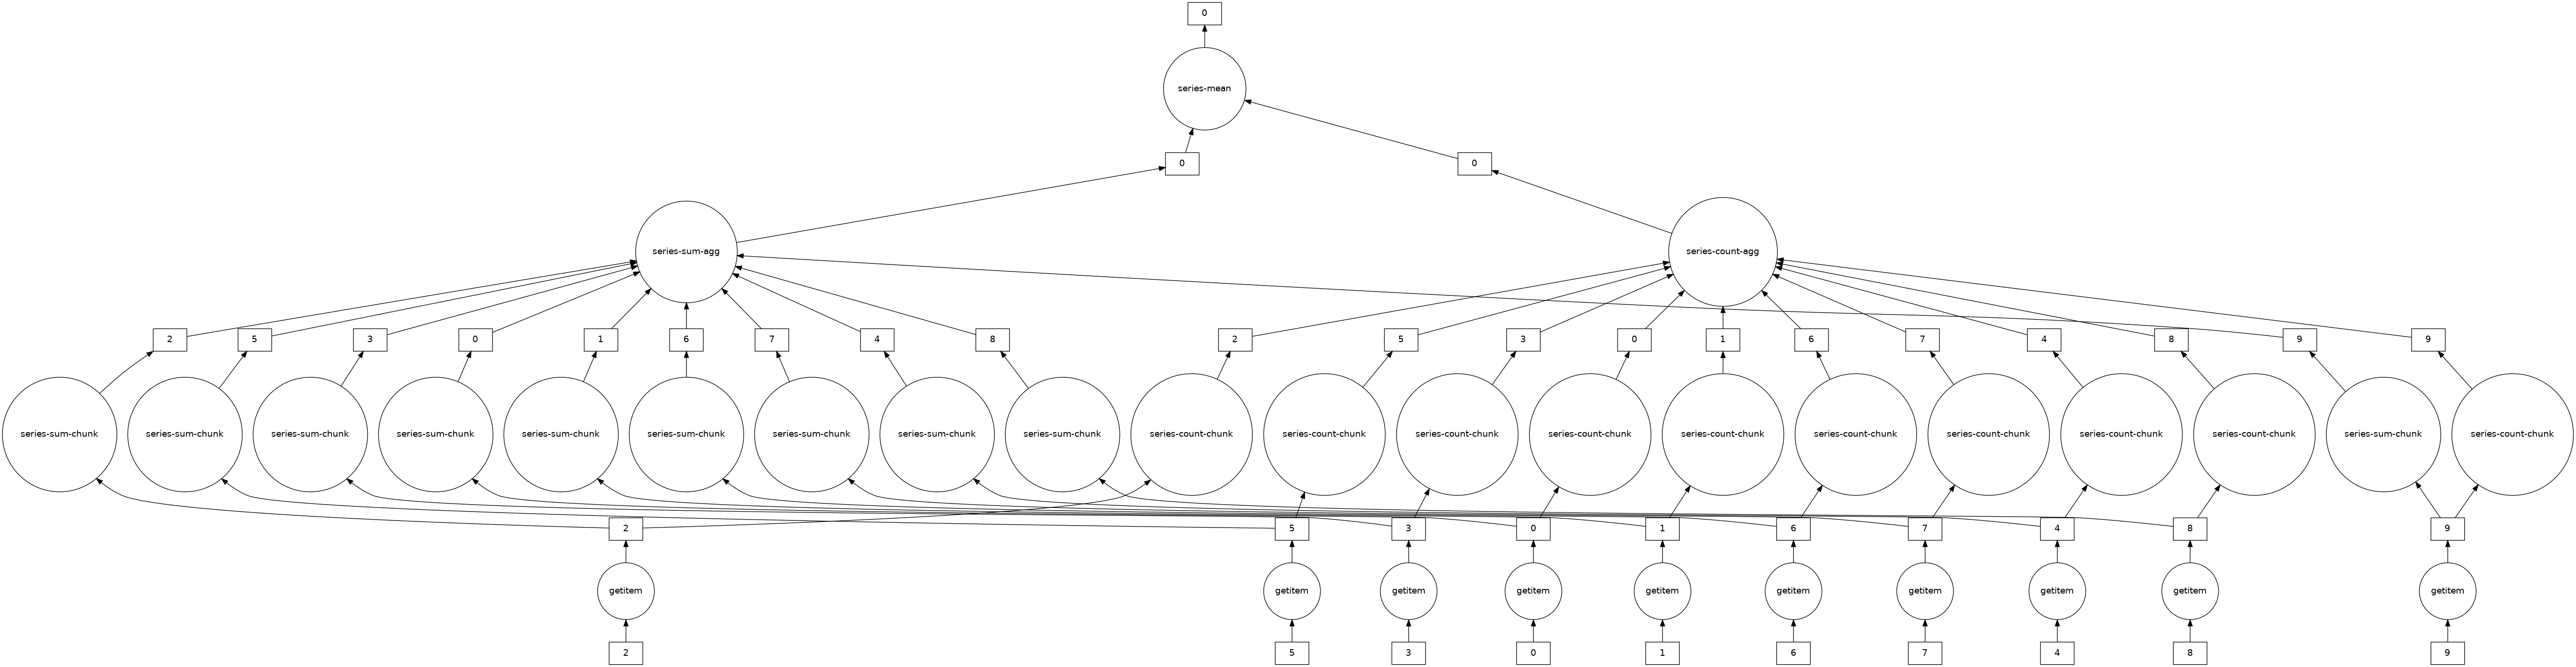

# compute
<class 'numpy.float64'>
1199.5


In [79]:
print_dask(obj)

In [80]:
# Note that the types are different.
obj = ddf["b"].unique().compute()
print_obj(obj)

obj = ddf["b"].compute().unique()
print_obj(obj)

type= <class 'pandas.core.series.Series'>


0    a
1    b
2    c
3    d
4    e
Name: b, dtype: object

type= <class 'numpy.ndarray'>


array(['a', 'b', 'c', 'd', 'e'], dtype=object)

In [81]:
# Methods can be chained together like in Pandas.
result = ddf["2021-10-01": "2021-10-09 5:00"].a.cumsum() - 100
print_obj(result)

type= <class 'dask.dataframe.core.Series'>


Dask Series Structure:
npartitions=1
2021-10-01 00:00:00.000000000    int64
2021-10-09 05:00:59.999999999      ...
Name: a, dtype: int64
Dask Name: sub, 7 graph layers

In [82]:
# Materialize.
obj = result.compute()
print_obj(obj)

type= <class 'pandas.core.series.Series'>


2021-10-01 00:00:00       620
2021-10-01 01:00:00      1341
2021-10-01 02:00:00      2063
2021-10-01 03:00:00      2786
2021-10-01 04:00:00      3510
                        ...  
2021-10-09 01:00:00    158301
2021-10-09 02:00:00    159215
2021-10-09 03:00:00    160130
2021-10-09 04:00:00    161046
2021-10-09 05:00:00    161963
Freq: H, Name: a, Length: 198, dtype: int64

### Visualize the Task Graph

type= <class 'dask.dataframe.core.Series'>
obj= Dask Series Structure:
npartitions=1
2021-10-01 00:00:00.000000000    int64
2021-10-09 05:00:59.999999999      ...
Name: a, dtype: int64
Dask Name: sub, 7 graph layers
# display


Dask Series Structure:
npartitions=1
2021-10-01 00:00:00.000000000    int64
2021-10-09 05:00:59.999999999      ...
Name: a, dtype: int64
Dask Name: sub, 7 graph layers

# dask


HighLevelGraph with 7 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7f0657122f80>
 0. from_pandas-e8d0c92b0364d788dd904838361b0fa2
 1. loc-4d57ed2634286c47ae7720535278fbac
 2. getitem-4abd5e5ddddab80f6cd715ad4c862e3b
 3. series-cumsum-map-ec0a737e92fd3d3fdb31508b4efb8997
 4. series-cumsum-take-last-3d314821fd8abbba14916b16e8e0648b
 5. series-cumsum-560074f709f422817cc9f94ccb8dd221
 6. sub-11050f195b967cdf56e9c4518c59eecf

# visualize


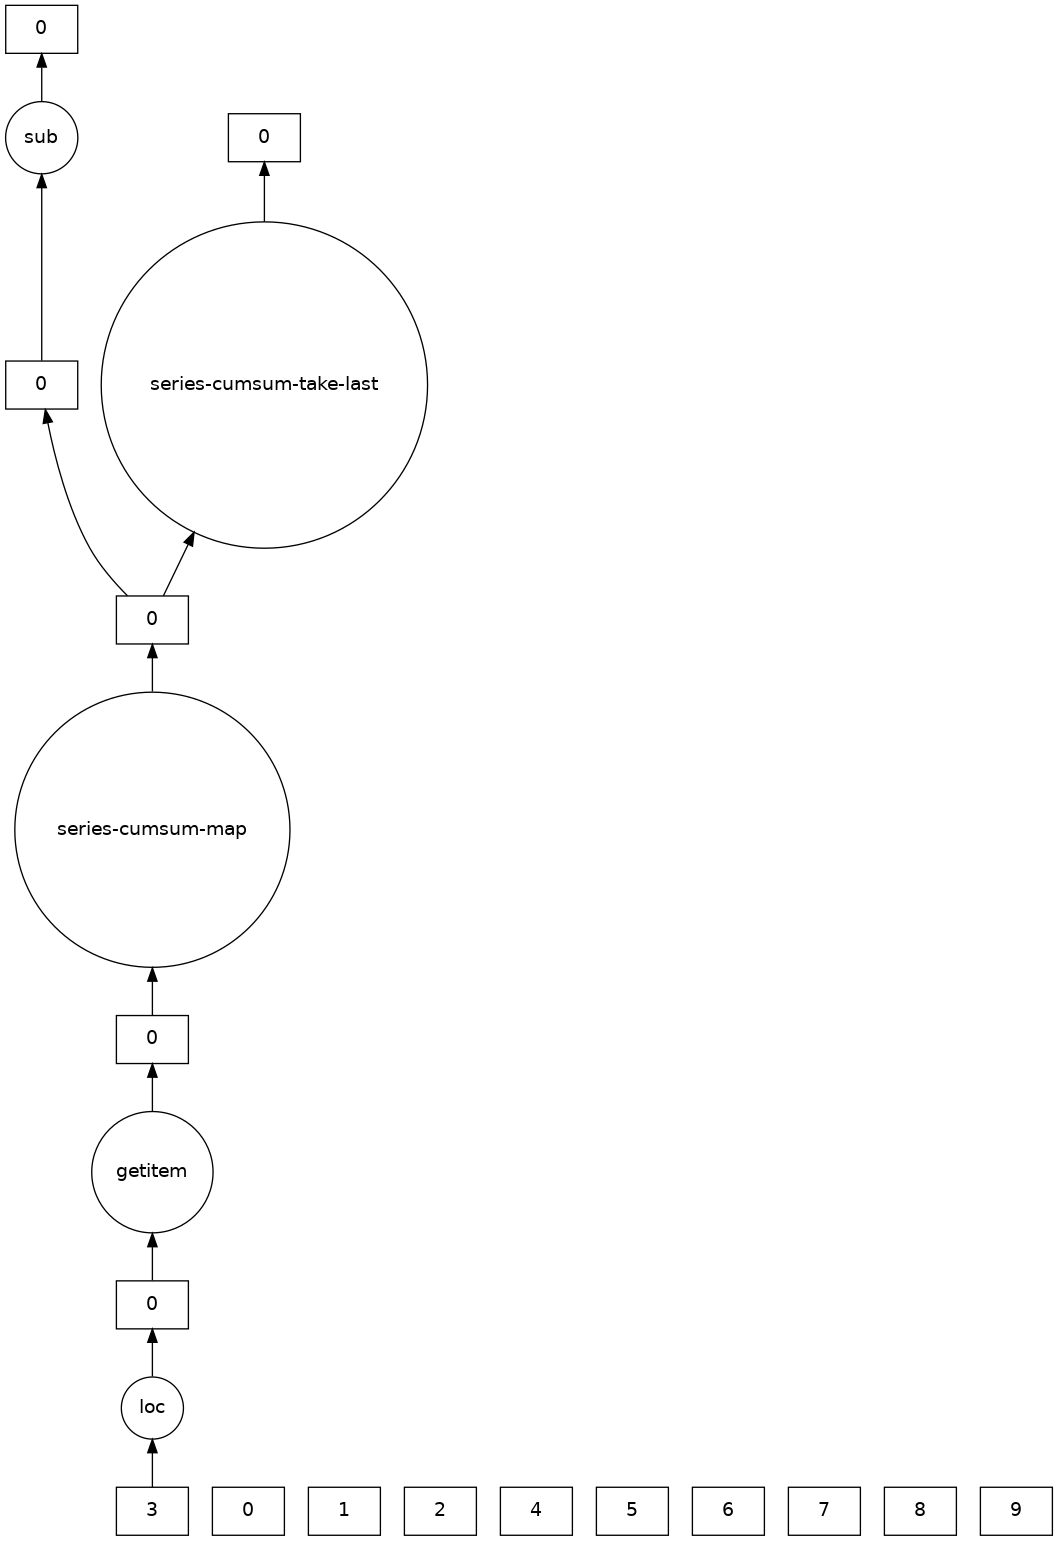

# compute
<class 'pandas.core.series.Series'>
2021-10-01 00:00:00       620
2021-10-01 01:00:00      1341
2021-10-01 02:00:00      2063
2021-10-01 03:00:00      2786
2021-10-01 04:00:00      3510
                        ...  
2021-10-09 01:00:00    158301
2021-10-09 02:00:00    159215
2021-10-09 03:00:00    160130
2021-10-09 04:00:00    161046
2021-10-09 05:00:00    161963
Freq: H, Name: a, Length: 198, dtype: int64


In [86]:
# result = ddf["2021-10-01": "2021-10-09 5:00"].a.cumsum() - 100
# result is a graph.
print_dask(result)

## Array

In [1]:
import numpy as np
import dask.array as da

# Create a 200 x 500 array.
data = np.arange(100_000).reshape(200, 500)
print(type(data), data.shape)
print("data=\n%s" % data)

<class 'numpy.ndarray'> (200, 500)
data=
[[    0     1     2 ...   497   498   499]
 [  500   501   502 ...   997   998   999]
 [ 1000  1001  1002 ...  1497  1498  1499]
 ...
 [98500 98501 98502 ... 98997 98998 98999]
 [99000 99001 99002 ... 99497 99498 99499]
 [99500 99501 99502 ... 99997 99998 99999]]


type= <class 'dask.array.core.Array'>
obj= dask.array<array, shape=(200, 500), dtype=int64, chunksize=(100, 100), chunktype=numpy.ndarray>
# display


dask.array<array, shape=(200, 500), dtype=int64, chunksize=(100, 100), chunktype=numpy.ndarray>

# dask


HighLevelGraph with 1 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7f06895c35b0>
 0. array-5f1b3c0ca172b03296ed6d431d3c9df7

# visualize


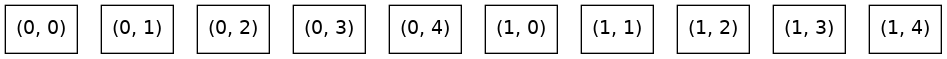

# compute
<class 'numpy.ndarray'>
[[    0     1     2 ...   497   498   499]
 [  500   501   502 ...   997   998   999]
 [ 1000  1001  1002 ...  1497  1498  1499]
 ...
 [98500 98501 98502 ... 98997 98998 98999]
 [99000 99001 99002 ... 99497 99498 99499]
 [99500 99501 99502 ... 99997 99998 99999]]


In [55]:
# Split in 100x100 chunks.
a = da.from_array(data, chunks=(100, 100))
print_dask(a)

# There are 10 chunks.

In [26]:
a.chunksize

(100, 100)

In [3]:
a.chunks

((100, 100), (100, 100, 100, 100, 100))

In [4]:
# Extract a block.
a.blocks[1, 3]

dask.array<blocks, shape=(100, 100), dtype=int64, chunksize=(100, 100), chunktype=numpy.ndarray>

### Indexing

In [40]:
# Slice.
# No computation is performed.
y = a[:50, 200]

type= <class 'dask.array.core.Array'>
obj= dask.array<transpose, shape=(500, 200), dtype=int64, chunksize=(100, 100), chunktype=numpy.ndarray>
# display


dask.array<transpose, shape=(500, 200), dtype=int64, chunksize=(100, 100), chunktype=numpy.ndarray>

# dask


HighLevelGraph with 2 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7f068958c3d0>
 0. array-5f1b3c0ca172b03296ed6d431d3c9df7
 1. transpose-40eff3384e2d1edf0d352ec28063563b

# visualize


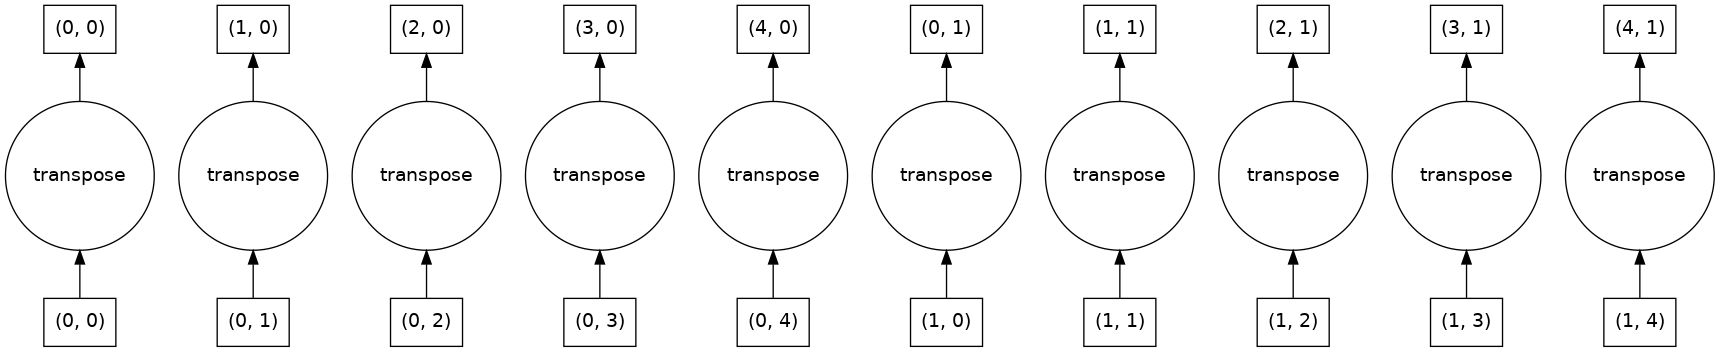

In [53]:
print_dask(y)

In [39]:
# Computation.
a[:50, 200].compute()

array([  200,   700,  1200,  1700,  2200,  2700,  3200,  3700,  4200,
        4700,  5200,  5700,  6200,  6700,  7200,  7700,  8200,  8700,
        9200,  9700, 10200, 10700, 11200, 11700, 12200, 12700, 13200,
       13700, 14200, 14700, 15200, 15700, 16200, 16700, 17200, 17700,
       18200, 18700, 19200, 19700, 20200, 20700, 21200, 21700, 22200,
       22700, 23200, 23700, 24200, 24700])

### Methods

type= <class 'dask.array.core.Array'>
obj= dask.array<mean_agg-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
# display


dask.array<mean_agg-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

# dask


HighLevelGraph with 5 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7f0689959d20>
 0. array-5f1b3c0ca172b03296ed6d431d3c9df7
 1. mean_chunk-1e263ab9b624eb9b9617de13daf06d81
 2. mean_combine-partial-89a3a638a520e2ed34fc069a1b1d2b25
 3. mean_combine-partial-4ede504d23e2e04bb9d17912facfc57e
 4. mean_agg-aggregate-1bd2d57c4aa590115fced0f7de53508b

# visualize


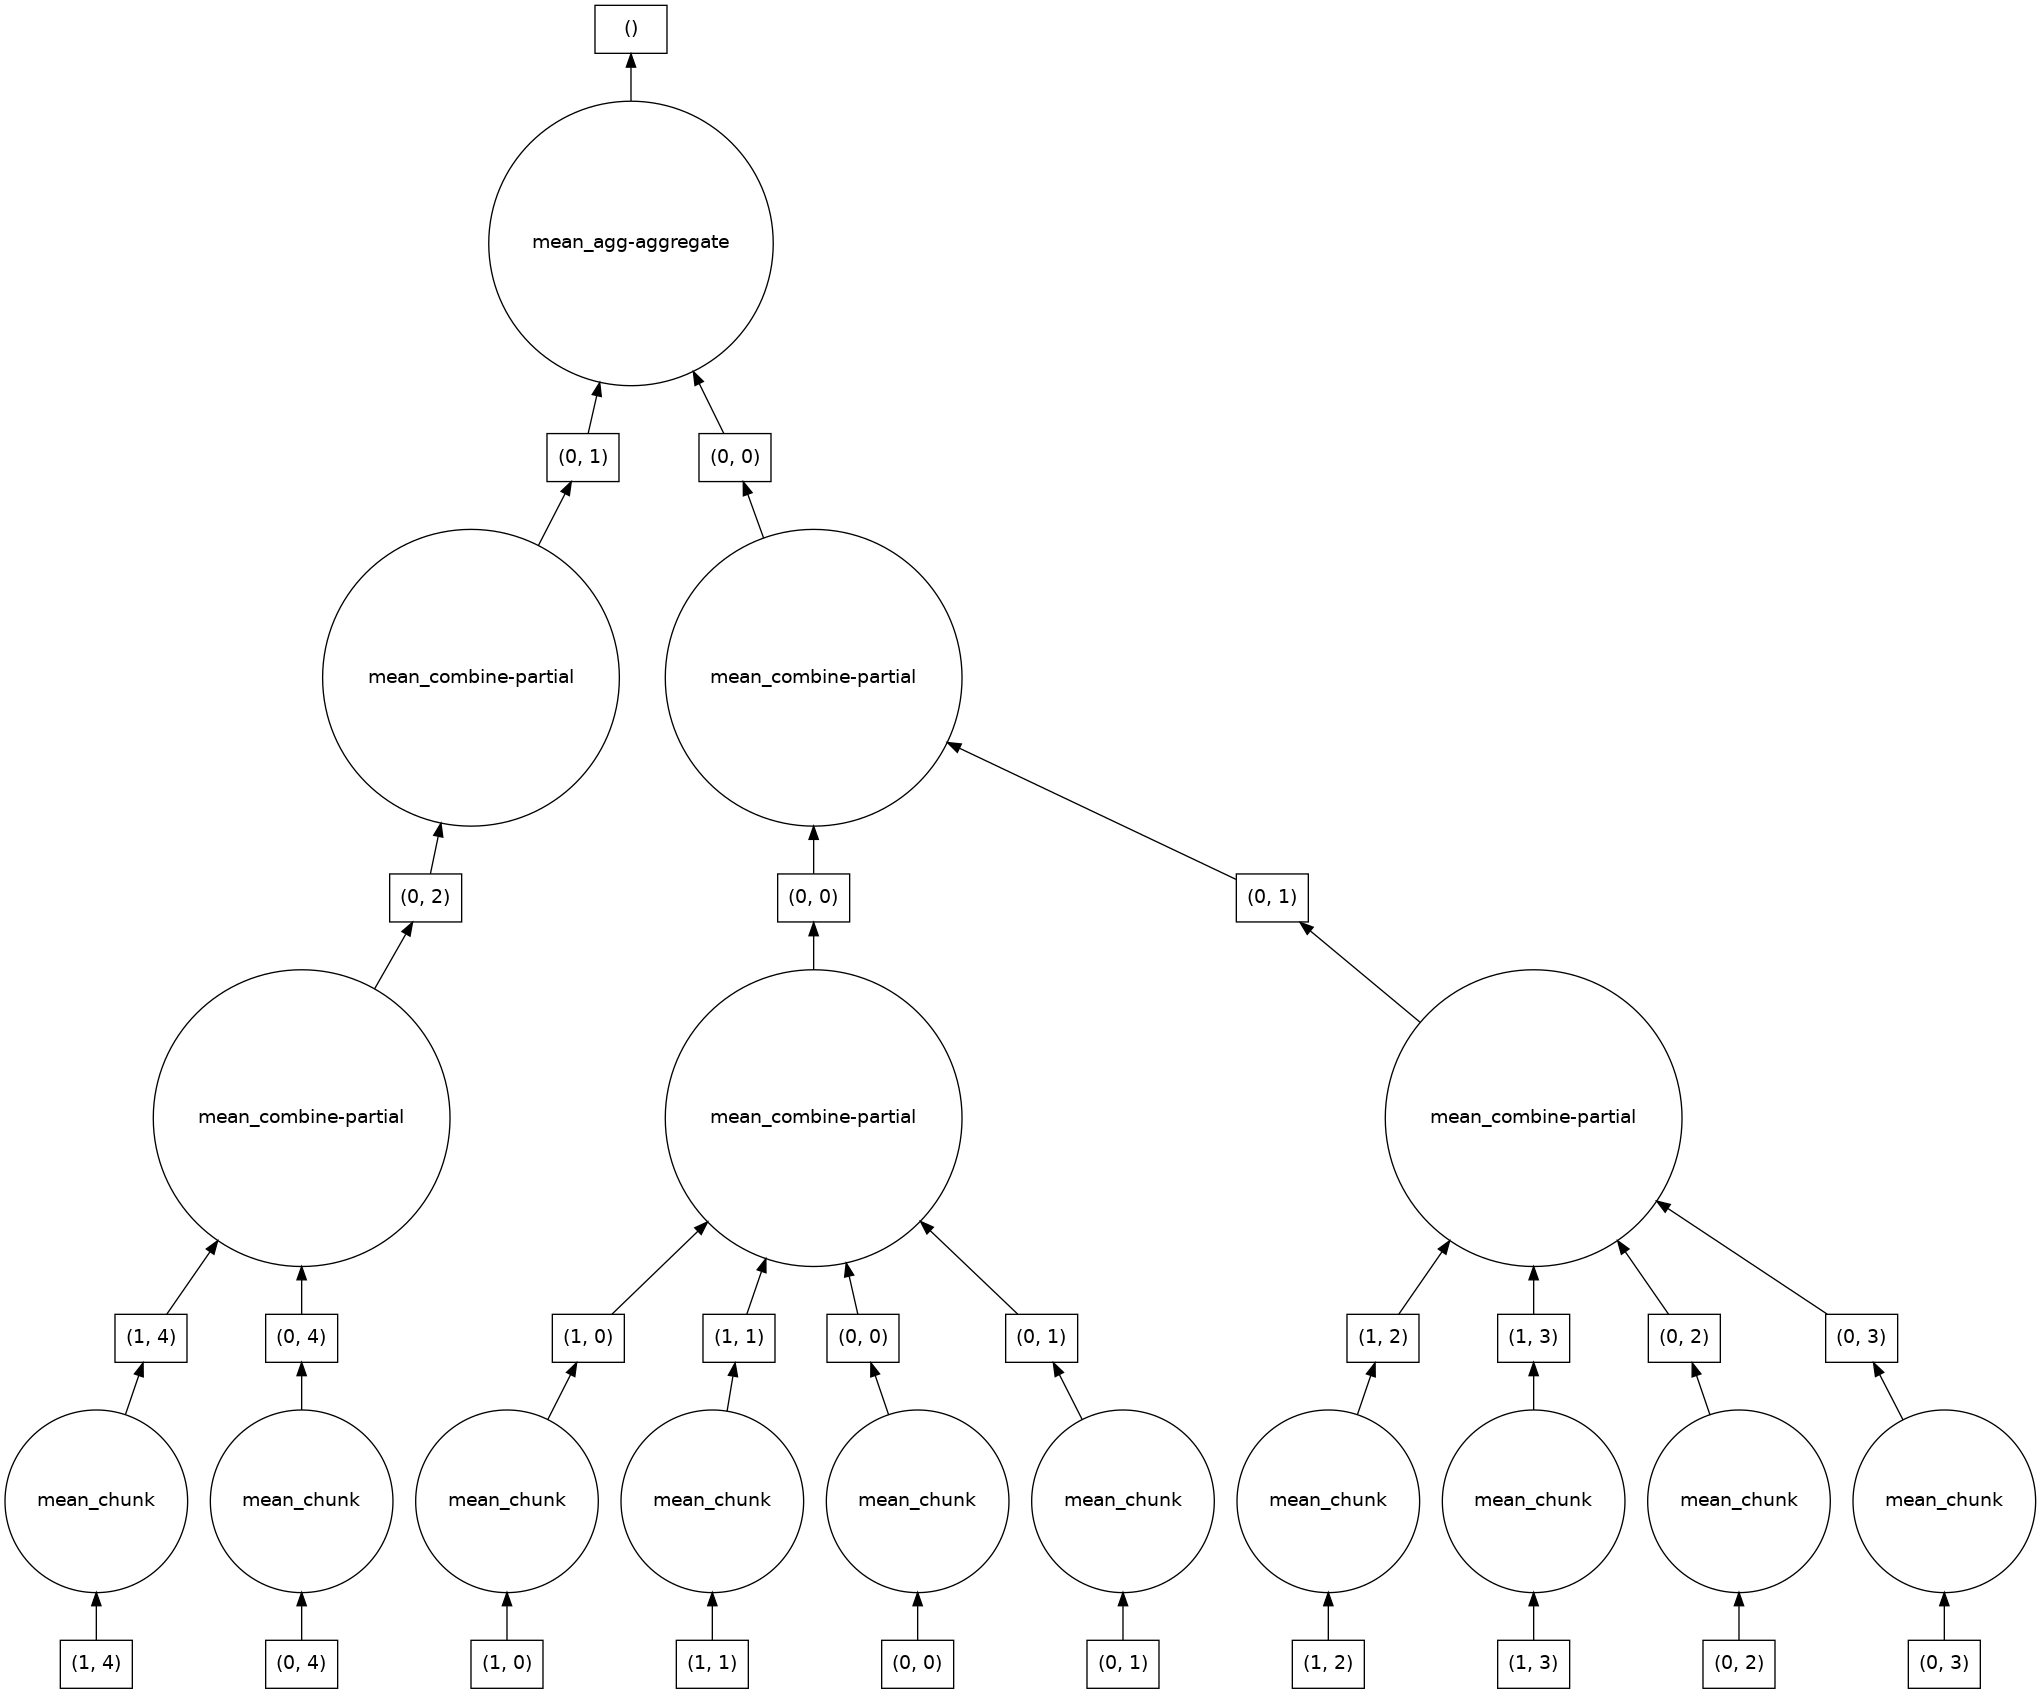

# compute
<class 'numpy.float64'>
49999.5


In [56]:
y = a.mean()
print_dask(y)

# Returns a scalar.

type= <class 'dask.array.core.Array'>
obj= dask.array<sin, shape=(200, 500), dtype=float64, chunksize=(100, 100), chunktype=numpy.ndarray>
# display


dask.array<sin, shape=(200, 500), dtype=float64, chunksize=(100, 100), chunktype=numpy.ndarray>

# dask


HighLevelGraph with 2 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7f0689918820>
 0. array-5f1b3c0ca172b03296ed6d431d3c9df7
 1. sin-541e8f06701dfecfe2a8c5137a60f494

# visualize


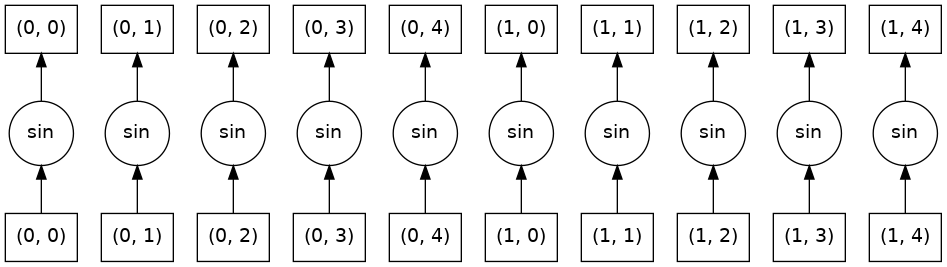

# compute
<class 'numpy.ndarray'>
[[ 0.          0.84147098  0.90929743 ...  0.58781939  0.99834363
   0.49099533]
 [-0.46777181 -0.9964717  -0.60902011 ... -0.89796748 -0.85547315
  -0.02646075]
 [ 0.82687954  0.9199906   0.16726654 ...  0.99951642  0.51387502
  -0.4442207 ]
 ...
 [-0.99720859 -0.47596473  0.48287891 ... -0.76284376  0.13191447
   0.90539115]
 [ 0.84645538  0.00929244 -0.83641393 ...  0.37178568 -0.5802765
  -0.99883514]
 [-0.49906936  0.45953849  0.99564877 ...  0.10563876  0.89383946
   0.86024828]]


In [57]:
y = np.sin(a)
print_dask(y)

type= <class 'dask.array.core.Array'>
obj= dask.array<transpose, shape=(500, 200), dtype=int64, chunksize=(100, 100), chunktype=numpy.ndarray>
# display


dask.array<transpose, shape=(500, 200), dtype=int64, chunksize=(100, 100), chunktype=numpy.ndarray>

# dask


HighLevelGraph with 2 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7f06895c1990>
 0. array-5f1b3c0ca172b03296ed6d431d3c9df7
 1. transpose-40eff3384e2d1edf0d352ec28063563b

# visualize


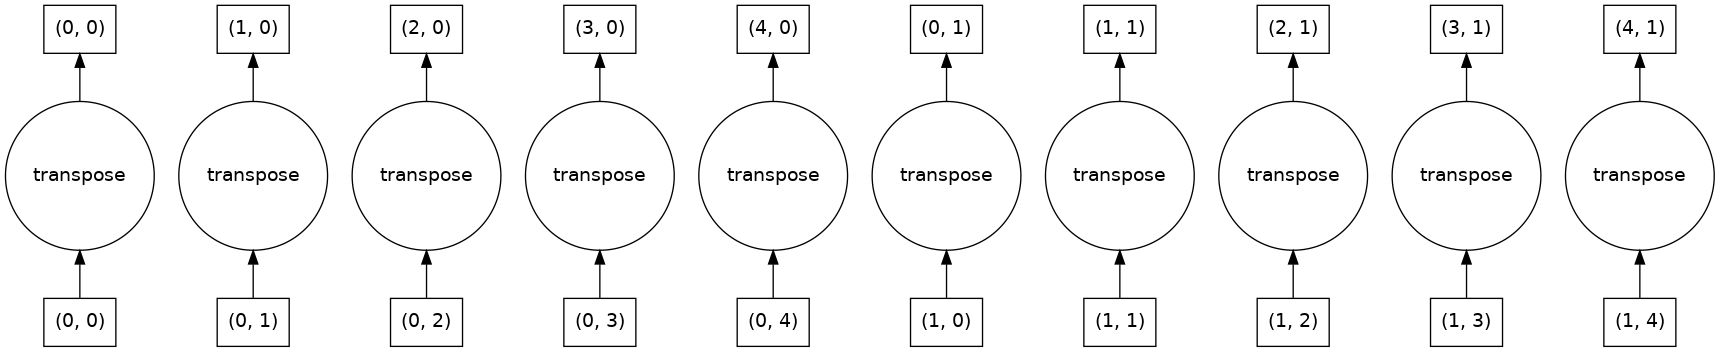

# compute
<class 'numpy.ndarray'>
[[    0   500  1000 ... 98500 99000 99500]
 [    1   501  1001 ... 98501 99001 99501]
 [    2   502  1002 ... 98502 99002 99502]
 ...
 [  497   997  1497 ... 98997 99497 99997]
 [  498   998  1498 ... 98998 99498 99998]
 [  499   999  1499 ... 98999 99499 99999]]


In [58]:
y = a.T
print_dask(y)

type= <class 'dask.array.core.Array'>
obj= dask.array<add, shape=(200,), dtype=int64, chunksize=(100,), chunktype=numpy.ndarray>
# display


dask.array<add, shape=(200,), dtype=int64, chunksize=(100,), chunktype=numpy.ndarray>

# dask


HighLevelGraph with 6 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7f068958d840>
 0. array-5f1b3c0ca172b03296ed6d431d3c9df7
 1. chunk_max-22359f6e7c214a78df6cd2673d3d603f
 2. chunk_max-partial-1dbed0d768d7fbafb3cb682ddb58870a
 3. amax-aggregate-f94050a9bd8876b51c0d09825ac793c8
 4. getitem-025f8710b7fd9db8a9d07629455d3e1a
 5. add-edf7897f1db3089799c2ef91c0c476db

# visualize


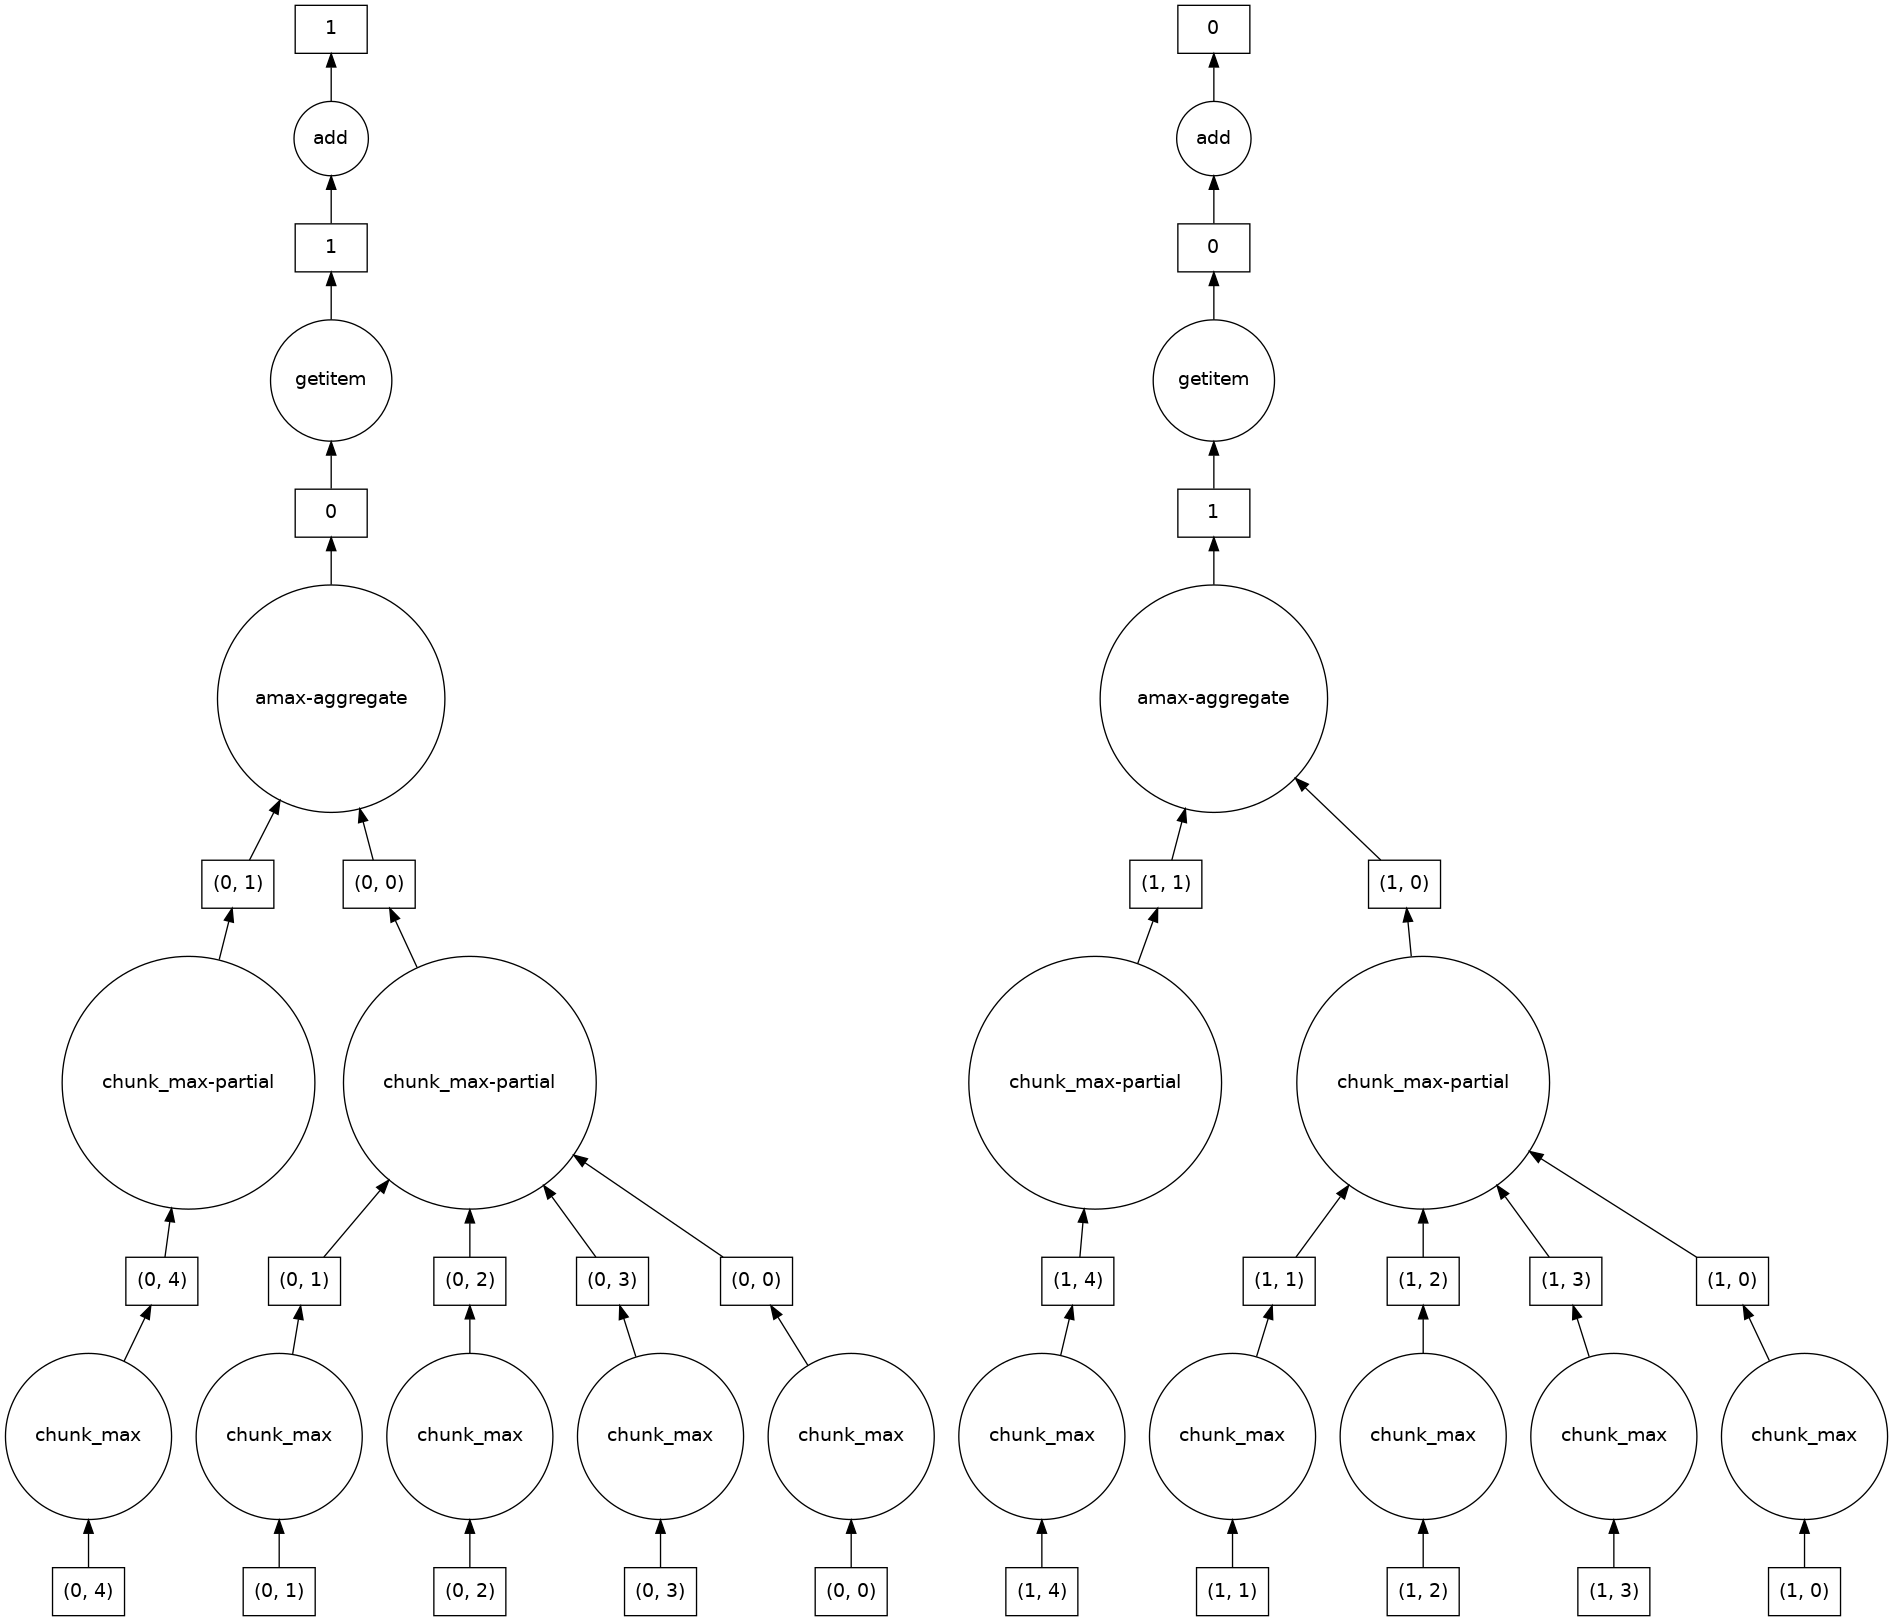

# compute
<class 'numpy.ndarray'>
[100009  99509  99009  98509  98009  97509  97009  96509  96009  95509
  95009  94509  94009  93509  93009  92509  92009  91509  91009  90509
  90009  89509  89009  88509  88009  87509  87009  86509  86009  85509
  85009  84509  84009  83509  83009  82509  82009  81509  81009  80509
  80009  79509  79009  78509  78009  77509  77009  76509  76009  75509
  75009  74509  74009  73509  73009  72509  72009  71509  71009  70509
  70009  69509  69009  68509  68009  67509  67009  66509  66009  65509
  65009  64509  64009  63509  63009  62509  62009  61509  61009  60509
  60009  59509  59009  58509  58009  57509  57009  56509  56009  55509
  55009  54509  54009  53509  53009  52509  52009  51509  51009  50509
  50009  49509  49009  48509  48009  47509  47009  46509  46009  45509
  45009  44509  44009  43509  43009  42509  42009  41509  41009  40509
  40009  39509  39009  38509  38009  37509  37009  36509  36009  35509
  35009  34509  34009  33509  33009  32509 

In [59]:
b = a.max(axis=1)[::-1] + 10
print_dask(b)

### Visualize the Task Graph

In [49]:
b.dask

HighLevelGraph with 6 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7f068995b820>
 0. array-5f1b3c0ca172b03296ed6d431d3c9df7
 1. chunk_max-22359f6e7c214a78df6cd2673d3d603f
 2. chunk_max-partial-1dbed0d768d7fbafb3cb682ddb58870a
 3. amax-aggregate-f94050a9bd8876b51c0d09825ac793c8
 4. getitem-025f8710b7fd9db8a9d07629455d3e1a
 5. add-edf7897f1db3089799c2ef91c0c476db

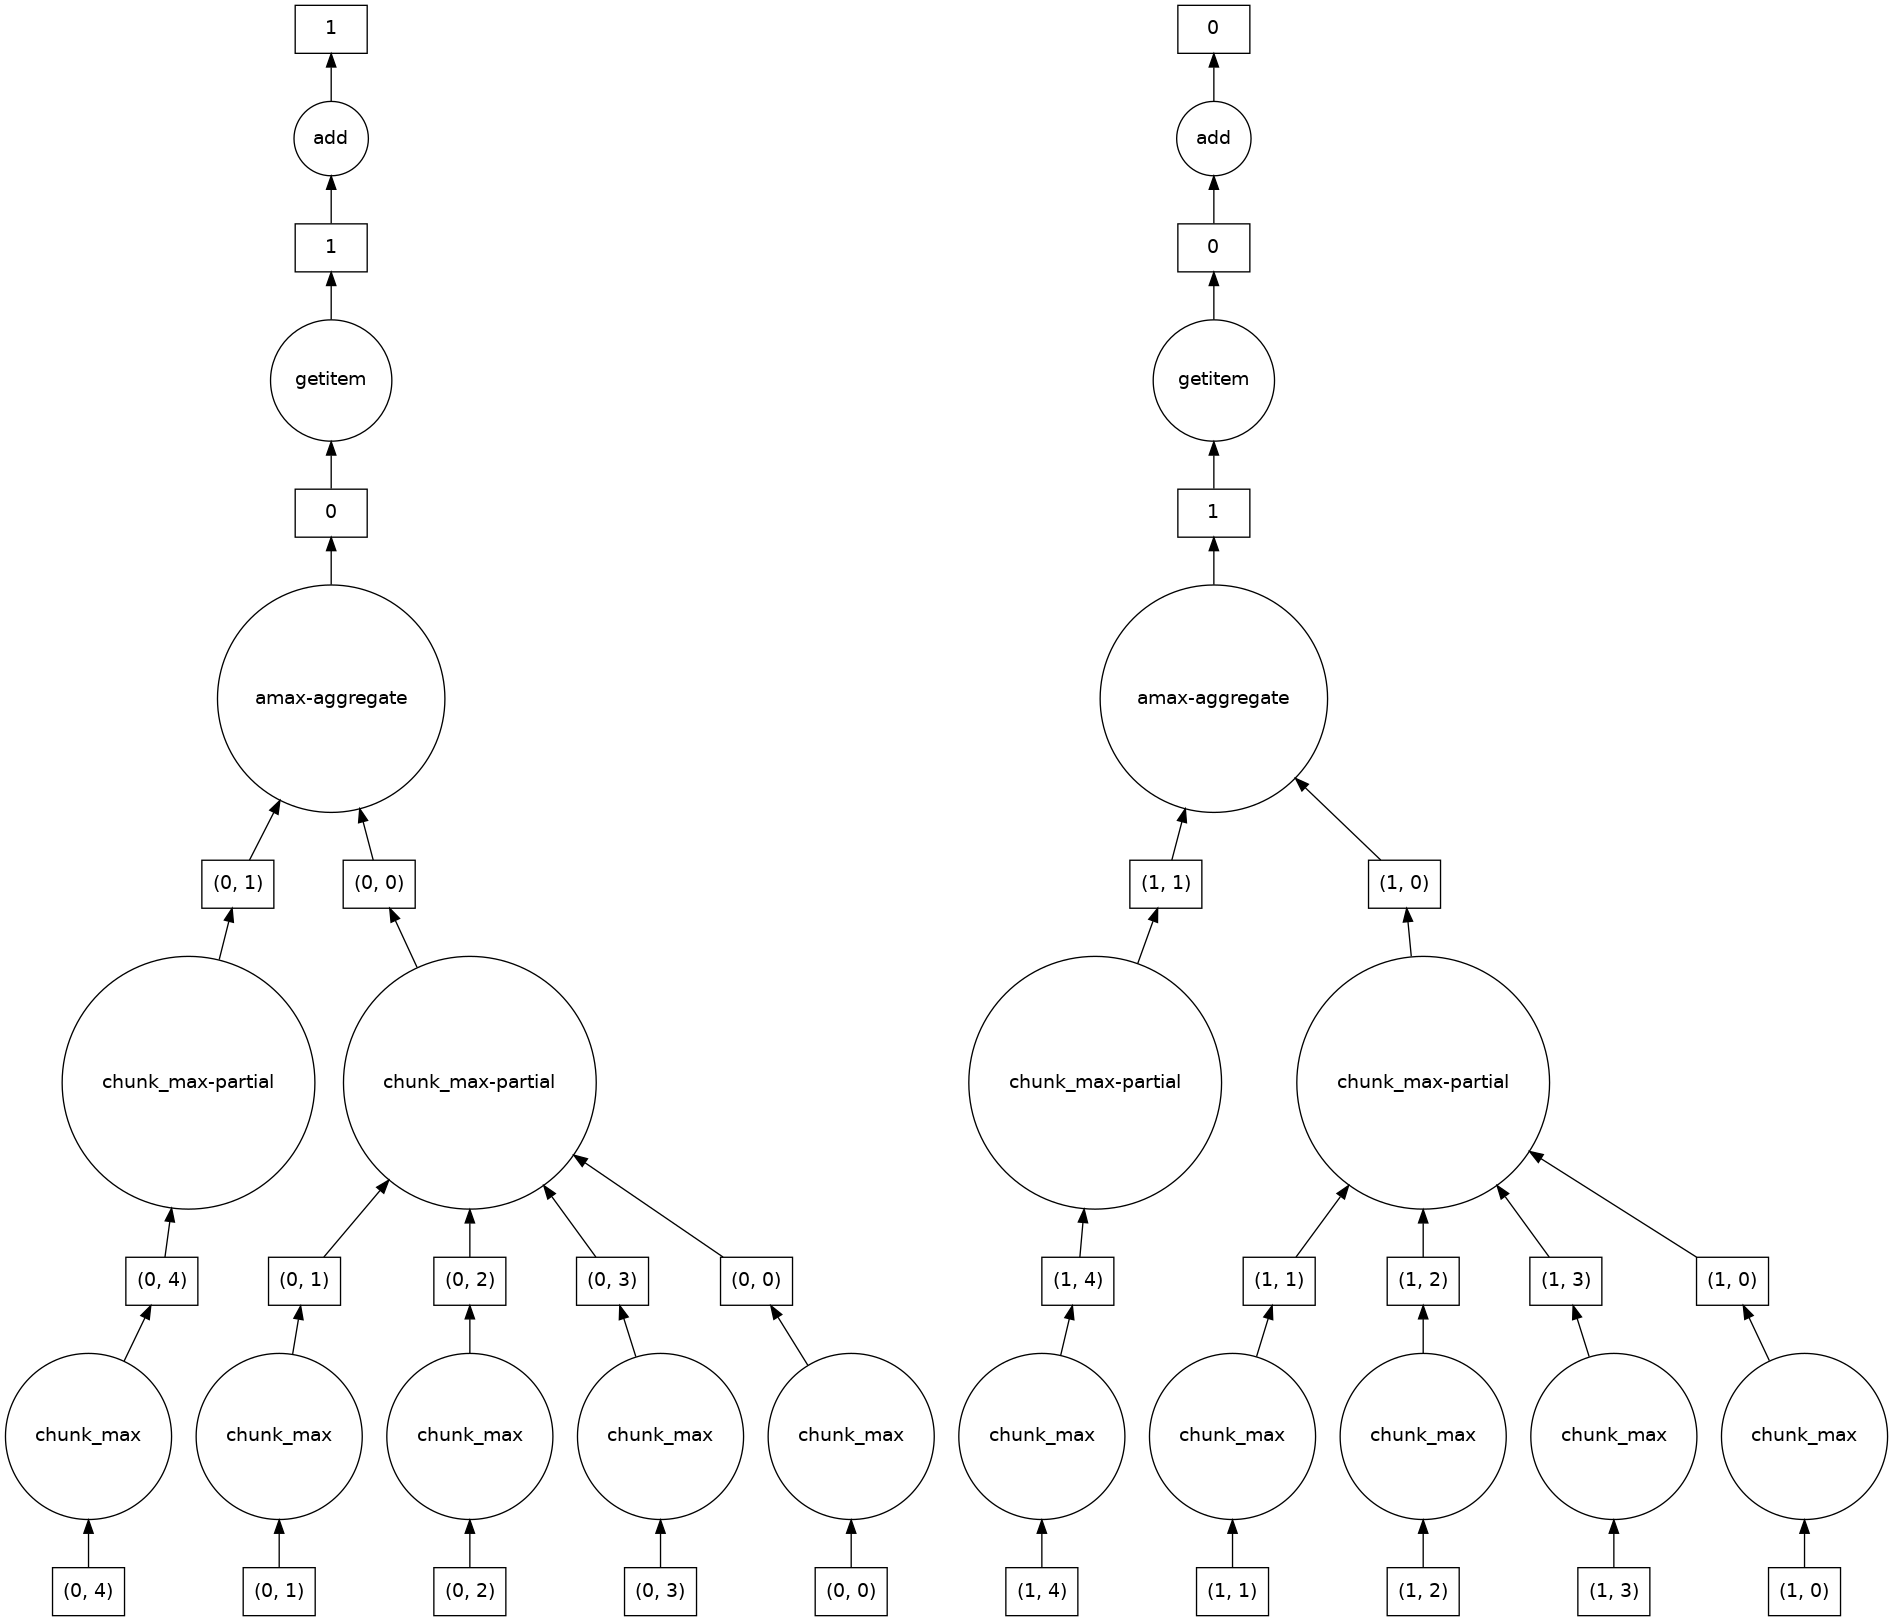

In [50]:
b.visualize()

## Bag 

### Creating a Dask object

In [29]:
# 8 items in two partitions.
b = db.from_sequence([1, 2, 3, 4, 5, 6, 2, 1], npartitions=2)

b

dask.bag<from_sequence, npartitions=2>

### Indexing

### Computation

In [30]:
b.compute()

[1, 2, 3, 4, 5, 6, 2, 1]

### Methods

In [31]:
b.filter(lambda x: x % 2)

dask.bag<filter-lambda, npartitions=2>

In [32]:
b.filter(lambda x: x % 2).compute()

[1, 3, 5, 1]

In [33]:
b.distinct()

dask.bag<distinct-aggregate, npartitions=1>

In [34]:
b.distinct().compute()

[1, 2, 3, 4, 5, 6]

In [35]:
c = db.zip(b, b.map(lambda x: x * 10))
c.compute()

[(1, 10), (2, 20), (3, 30), (4, 40), (5, 50), (6, 60), (2, 20), (1, 10)]

### Visualize the Task Graph

In [36]:
c.dask

HighLevelGraph with 3 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7fc9e073f430>
 0. from_sequence-cca2a33ba6e12645a0c9bc0fd3fe6c88
 1. lambda-626f4e3c7602cb6b6ef12820d9a259b0
 2. zip-db7cba0cafcbcdec83416fc90ad8580d

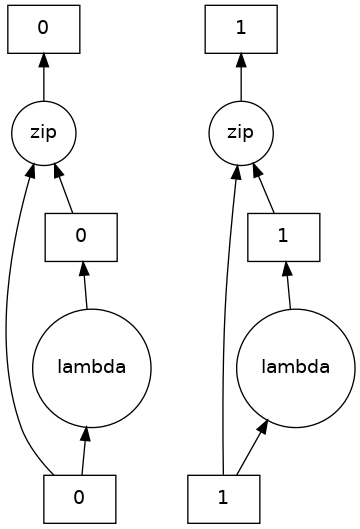

In [37]:
c.visualize()

# Low-level interfaces

## Delayed

In [38]:
# In the following example there is parallelism to exploit, but it doesn't fit one of
# the native Dask data structures.

def inc(x):
    return x + 1

def double(x):
    return x * 2

def add(x, y):
    return x + y

data = [1, 2, 3, 4, 5]

output = []
for x in data:
    # (x + 1) + (x * 2) = 3x + 1
    a = inc(x)
    b = double(x)
    c = add(a, b)
    # 1 -> 4
    # 2 -> 7
    # 3 -> 10
    # 4 -> 13
    # 5 -> 16
    output.append(c)

# 4 + 7 + 10 + 13 + 16 = 20 + 20 + 10 = 50
total = sum(output)
print(total)

50


In [39]:
# Decorate 

import dask

# This is equivalent to the decorator.
# @dask.delayed
# def inc(x):
#     return x + 1


output = []
for x in data:
    a = dask.delayed(inc)(x)
    b = dask.delayed(double)(x)
    c = dask.delayed(add)(a, b)
    output.append(c)

total = dask.delayed(sum)(output)

total.dask

HighLevelGraph with 16 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7fc9e073f670>
 0. double-4c056766-ca53-4f3a-91d8-5c1d70d2fe14
 1. inc-31e922a6-530b-4c26-8847-7ba682ce3366
 2. add-79f40970-9f4b-469d-8c10-cebed9e7e217
 3. double-ce1d52e2-66c5-4f61-92df-83eb11bbd6ea
 4. inc-977f7ba8-6725-4843-8d82-5b282a012923
 5. add-e2415e40-e04e-498d-b802-88937c6b9672
 6. double-8c4cea0c-d104-4cf8-9048-1f7d6215c930
 7. inc-1cbb37f3-43ff-404f-afa8-fd158d34b846
 8. add-8c612602-2c15-42da-a3e5-c17bb609b8a5
 9. double-80a7b73c-a06b-4b0e-a2c8-aed764442625
 10. inc-4cbb1d3a-a449-400f-831f-d35d3797ef78
 11. add-c74b9bba-dffc-4012-917b-d34537da77fa
 12. double-3f62399c-c6b4-45f9-b078-8aa4cb7caa7a
 13. inc-49b8745d-e7f1-446f-8186-c93d503e8eec
 14. add-73978473-7fc0-49aa-8e95-6f2237c5a8a1
 15. sum-7dca2dec-943b-4464-b089-639e201cae49

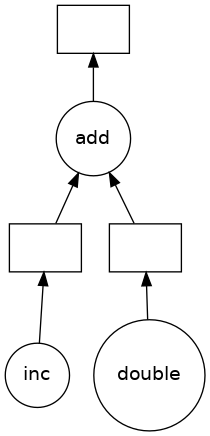

In [40]:
# This is the computation inside a node.
c.visualize()

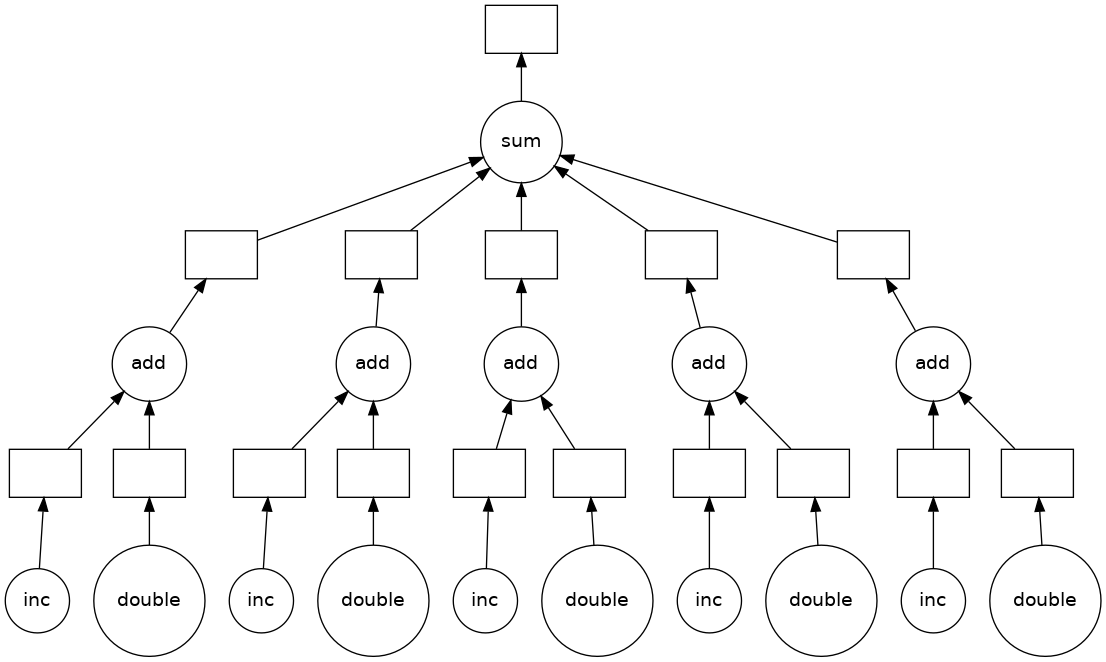

In [41]:
# This is the unrolled computation.
total.visualize()

In [42]:
# Trigger the computation.
total.compute()

50

## Futures

In [44]:
# https://stackoverflow.com/questions/59070260/dask-client-detect-local-default-cluster-already-running
import os
os.environ['DASK_SCHEDULER_ADDRESS'] = 'tcp://localhost:8786'

if not ("cluster" in globals() and "client" in globals()):
    from dask.distributed import Client, LocalCluster
    cluster = LocalCluster(dashboard_address=':8787')
    client = Client(cluster)
    print(client, client.dashboard_link)

<Client: 'tcp://127.0.0.1:46717' processes=4 threads=8, memory=31.01 GiB> http://127.0.0.1:8787/status


In [ ]:
# import time
# from dask.distributed import Client, LocalCluster
# with LocalCluster(dashboard_address=':8787') as cluster:
#    with Client(cluster) as client:
#        print(client, client.dashboard_link)
# time.sleep(1)
# with LocalCluster(dashboard_address=':8787') as cluster:
#    with Client(cluster) as client:
#        print(client, client.dashboard_link)

In [45]:
from dask.distributed import Client, LocalCluster

def inc(x):
    return x + 1


def add(x, y):
    return x + y


# Submit and start eagerly.
a = client.submit(inc, 1)
b = client.submit(inc, 2)
c = client.submit(add, a, b)


# This is blocking until everything is completed.
c = c.result()

# Scheduling

In [ ]:
# from dask.distributed import Client

# client = Client()
# client

In [ ]:
client.dashboard_link